In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


In [13]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)

tree.fit(X_train,y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test,y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


In [4]:
conda install graphviz

Solving environment: ...working... done

# All requested packages already installed.
Note: you may need to restart the kernel to use updated packages.




In [5]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file='tree.dot',class_names=['악성','양성'],
               feature_names=cancer.feature_names,impurity=False,filled=True)

In [6]:
import graphviz

In [11]:
import pandas as pd
from IPython.display import display

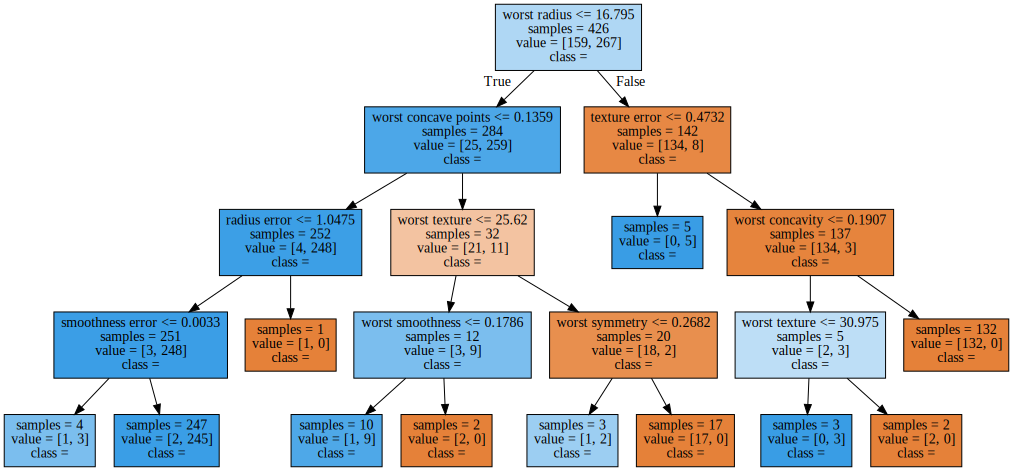

In [5]:
with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [7]:
print('특성 중요도:\n{}'.format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


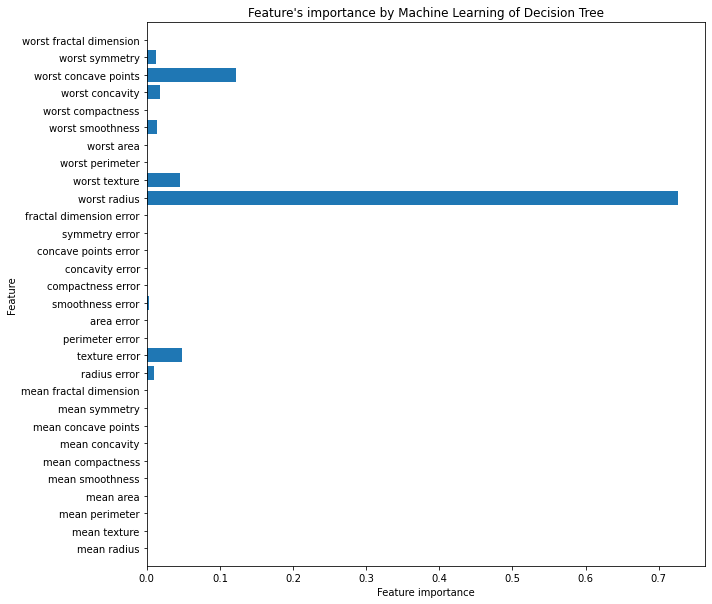

In [8]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Feature's importance by Machine Learning of Decision Tree")

plot_feature_importances_cancer(tree)

In [9]:
## cancer data와 target을 scatter plot으로 그림을 그리고,
## max_depth를 무엇으로 선택했을 때 테스트 셋에 대한 확률을 가장 크게 만들 수 있는지 확인하는 함수를 작성하세요.

In [9]:
import seaborn as sns

In [15]:
df = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

Text(0, 0.5, 'malignity')

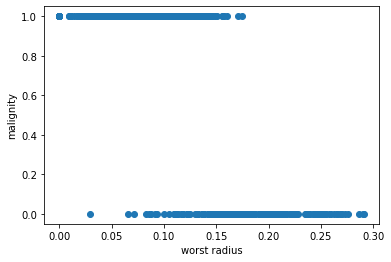

In [20]:
plt.scatter(cancer.data[0:,27],cancer.target)
plt.xlabel('worst radius')
plt.ylabel('malignity')

Text(0, 0.5, 'malignity')

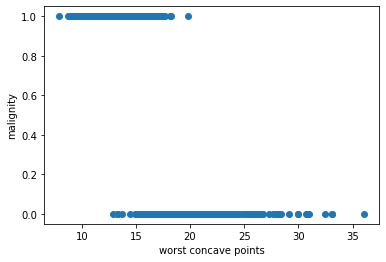

In [21]:
plt.scatter(cancer.data[0:,20],cancer.target)
plt.xlabel('worst concave points')
plt.ylabel('malignity')

In [24]:
def max_depth():
    temp=0
    kfc=0
    k_range=range(1,41)
    
    for i in k_range:
        rm=DecisionTreeClassifier(max_depth=i, random_state=101)
        rm.fit(X_train, y_train)
        
        if(temp < rm.score(X_test,y_test)):
            temp=rm.score(X_test,y_test)
            kfc=i
            
    return kfc
max_depth()

6